In [1]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.pipeline import Pipeline

# Read and Visualize the Data

In [2]:
# read in data
data = pd.read_csv('NewYork.csv')
# Describe the data
data.head()
for col in data.columns: 
    print(col) 

id
host_response_time
host_response_rate
host_is_superhost
host_has_profile_pic
neighbourhood_cleansed
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
guests_included
minimum_nights
maximum_nights
calendar_updated
availability_30
number_of_reviews
review_scores_rating
instant_bookable
is_business_travel_ready
cancellation_policy
require_guest_profile_picture
reviews_per_month


(-1.1019296620684242,
 1.1089713385687547,
 -1.1215025656294224,
 1.1010239316966393)

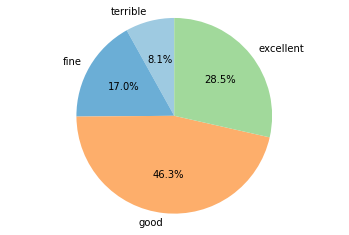

In [3]:
# pie
tmp  = data['review_scores_rating']
not_nan = tmp[tmp>0]
labels = 'terrible','fine','good','excellent'
terrible = len(tmp[tmp<=80])  # rate<=80
fine = len(tmp[tmp<=90])-terrible # 80 < rate <= 90
good = len(tmp[tmp<100]) - terrible - fine # 95 < rate < 100
excellent = len(tmp[tmp==100]) # rate = 100
sizes = [terrible, fine, good, excellent]
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([2, 1,6,10]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct = '%1.1f%%',shadow=False, startangle = 90,colors = colors)
ax1.axis('equal')

21837 21837


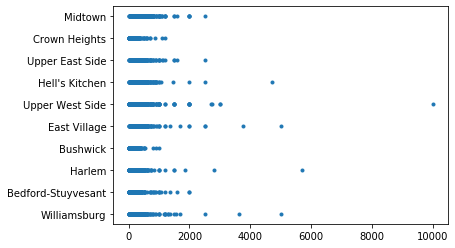

In [4]:
regions = collections.Counter(data['neighbourhood_cleansed'])
sort_r = sorted(regions.items(), key = lambda x: x[1],reverse = True)[:10]
x_plt = []
y_plt = []
for i in range(len(sort_r)):
    price = data['price']
    regs = data['neighbourhood_cleansed']
    idxs = [regs==sort_r[i]]
    s= list(price[regs == sort_r[i][0]])
    x_plt += s
    y_plt += [sort_r[i][0]]*len(s)

print(len(x_plt),len(y_plt))
plt.plot(x_plt,y_plt,".")

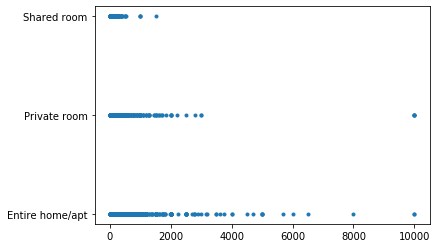

In [5]:
beds = data['room_type']
price = data['price']
plt.plot(price,beds,".")

# Data cleansing

In [6]:
data = data.drop(['id','neighbourhood_cleansed','host_has_profile_pic', 'latitude', 'longitude', 'square_feet', 'guests_included',
          'maximum_nights', 'calendar_updated', 'require_guest_profile_picture', 'is_business_travel_ready',
          'reviews_per_month', 'review_scores_rating'], axis = 1)


In [7]:
data

,host_response_time,host_response_rate,host_is_superhost,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,availability_30,number_of_reviews,instant_bookable,cancellation_policy
0,NaN,NaN,f,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",110,6,0,0,f,strict
1,within an hour,100%,f,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Kitche...",50,1,19,2,f,moderate
2,within an hour,100%,f,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",125,3,28,21,f,strict
3,within a few hours,100%,f,f,Boat,Entire home/apt,4,1.0,1.0,3.0,Real Bed,{},100,3,30,0,t,strict
4,NaN,NaN,f,t,House,Entire home/apt,4,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",300,7,30,0,f,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,within an hour,90%,f,f,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Kitche...",90,1,30,1,t,flexible
44313,within a few hours,100%,f,t,Apartment,Entire home/apt,6,1.0,3.0,5.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Kitche...",199,3,4,0,t,strict
44314,within an hour,100%,f,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{""Wheelchair accessible"",Kitchen,""Free parking...",91,1,1,6,f,moderate
44315,within an hour,100%,f,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",75,2,7,0,f,strict


In [8]:
for key in data:
    data = data[pd.notnull(data[key])]

In [9]:
data.host_response_time.unique()

array(['within an hour', 'within a few hours', 'a few days or more',
       'within a day'], dtype=object)

In [10]:
data['host_response_time'] = data['host_response_time'].map({'within an hour': 1, 'within a few hours': 2, 
                                                            'a few days or more': 4, 'within a day': 3})

In [11]:
data.dtypes

host_response_time       int64
host_response_rate      object
host_is_superhost       object
is_location_exact       object
property_type           object
room_type               object
accommodates             int64
bathrooms              float64
bedrooms               float64
beds                   float64
bed_type                object
amenities               object
price                    int64
minimum_nights           int64
availability_30          int64
number_of_reviews        int64
instant_bookable        object
cancellation_policy     object
dtype: object

In [12]:
def p2f(x):
    return float(x.strip('%'))/100

In [13]:
data['host_response_rate'] = data['host_response_rate'].apply(p2f)

In [14]:
data['host_is_superhost'] = data['host_is_superhost'].map({'f': 0, 't': 1})

In [15]:
data['is_location_exact'] = data['is_location_exact'].map({'f': 0, 't': 1})

In [16]:
data.property_type.unique()

array(['House', 'Apartment', 'Boat', 'Townhouse', 'Condominium', 'Dorm',
       'Earth House', 'Other', 'Bed & Breakfast', 'Loft', 'Guesthouse',
       'Guest suite', 'Bungalow', 'Timeshare', 'Hostel', 'Chalet',
       'Vacation home', 'In-law', 'Treehouse', 'Serviced apartment',
       'Villa', 'Yurt', 'Cabin', 'Boutique hotel', 'Castle', 'Train'],
      dtype=object)

In [17]:
collections.Counter(data['property_type'])

Counter({'House': 3159,
         'Apartment': 24762,
         'Boat': 9,
         'Townhouse': 720,
         'Condominium': 477,
         'Dorm': 24,
         'Earth House': 3,
         'Other': 233,
         'Bed & Breakfast': 110,
         'Loft': 656,
         'Guesthouse': 56,
         'Guest suite': 52,
         'Bungalow': 18,
         'Timeshare': 74,
         'Hostel': 38,
         'Chalet': 3,
         'Vacation home': 7,
         'In-law': 6,
         'Treehouse': 1,
         'Serviced apartment': 7,
         'Villa': 20,
         'Yurt': 1,
         'Cabin': 2,
         'Boutique hotel': 20,
         'Castle': 1,
         'Train': 1})

In [18]:
data['property_type'] = data['property_type'].map({'House': 1, 'Apartment': 1, 'Townhouse': 1, 'Condominium': 1, 'Boat': 3,
                                                    'Dorm': 1, 'Earth House': 3, 'Other': 3, 'Bed & Breakfast':1,
                                                  'Loft':1, 'Guesthouse': 1, 'Guest suite': 1, 'Bungalow': 1,
                                                  'Timeshare': 2, 'Chalet':2, 'Vacation home': 2,'Hostel':3, 'In-law': 1,
                                                  'Treehouse': 3, 'Serviced apartment': 2, 'Villa': 2, 'Yurt': 3,
                                                  'Cabin': 2, 'Boutique hotel': 1, 'Castle': 3, 'Train': 3})

In [19]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [20]:
data['room_type'] = data['room_type'].map({'Private room': 2, 'Entire home/apt': 1, 'Shared room': 3})

In [21]:
data.bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [22]:
collections.Counter(data['bed_type'])

Counter({'Real Bed': 29663,
         'Pull-out Sofa': 262,
         'Futon': 322,
         'Airbed': 137,
         'Couch': 76})

In [23]:
data['bed_type'] = data['bed_type'].map({'Real Bed': 1, 'Pull-out Sofa': 2, 'Futon': 2, 'Airbed': 2,
                                                  'Couch': 2})

In [24]:
data['instant_bookable'] = data['instant_bookable'].map({'f': 0, 't': 1})

In [25]:
data.cancellation_policy.unique()

array(['moderate', 'strict', 'flexible', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [26]:
collections.Counter(data['cancellation_policy'])

Counter({'moderate': 7779,
         'strict': 15939,
         'flexible': 6728,
         'super_strict_30': 11,
         'super_strict_60': 3})

In [27]:
data['cancellation_policy'] = data['cancellation_policy'].map({'moderate': 1, 'strict': 2, 'flexible': 3, 
                                                               'super_strict_30': 4, 'super_strict_60': 5})

In [28]:
def wifi(value):
    if "wireless internet" in value.lower():
        return 1
    else:
        return 0
    
data["wifi"] = data["amenities"].apply(wifi)

In [29]:
def tv(value):
    if "tv" in value.lower():
        return 1
    elif "cable tv" in value.lower():
        return 1
    else:
        return 0
    
data["tv"] = data["amenities"].apply(tv)

In [30]:
def ac(value):
    if "air conditioning" in value.lower():
        return 1
    else:
        return 0
    
data["ac"] = data["amenities"].apply(ac)

In [31]:
def kitchen(value):
    if "kitchen" in value.lower():
        return 1
    else:
        return 0
    
data["kitchen"] = data["amenities"].apply(kitchen)

In [32]:
def hair_dryer(value):
    if "hair dryer" in value.lower():
        return 1
    else:
        return 0
    
data["hair_dryer"] = data["amenities"].apply(hair_dryer)

In [33]:
def free_park(value):
    if "free parking on premises" in value.lower():
        return 1
    else:
        return 0
    
data["free_park"] = data["amenities"].apply(free_park)

In [34]:
data = data.drop(['amenities'], axis = 1)


In [35]:
data.to_csv("output2.csv")

In [36]:
data = pd.read_csv('output2.csv')

In [37]:
features_to_normalize = ['availability_30', 'number_of_reviews']
data[features_to_normalize] = data[features_to_normalize].apply(lambda x:10*((x-x.min()) / (x.max()-x.min())))

In [38]:
X1 = data.iloc[:,1:12] #independent columns
X2 = data.iloc[:,13:]
X = pd.concat([X1, X2], axis=1)
Y = data.iloc[:,12]    #target column i.e price range

# Starting Regression

In [39]:
model = LinearRegression()
model.fit(X,Y)
print(model.coef_) #use inbuilt class feature_importances of tree based classifiers

[  0.54318654 -47.78887609  14.87670157  -4.66551816  23.43709396
 -72.16412633  28.33003625  86.37866273  19.88419287 -16.78798787
   8.51156948   0.32454796   6.27887851  -9.33030461  -4.59952675
   6.48209609 -11.25410344  15.26614249  10.52090189  -6.1143184
  -0.32034783 -32.32370174]


In [40]:
y_pred2 = model.predict(X)

In [41]:
print(r2_score(Y,y_pred2))

0.24294482330715195


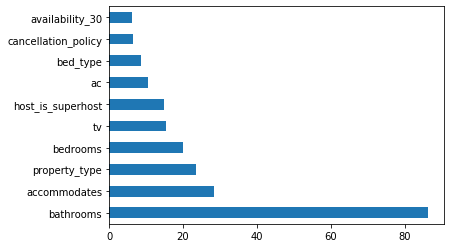

In [42]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.coef_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

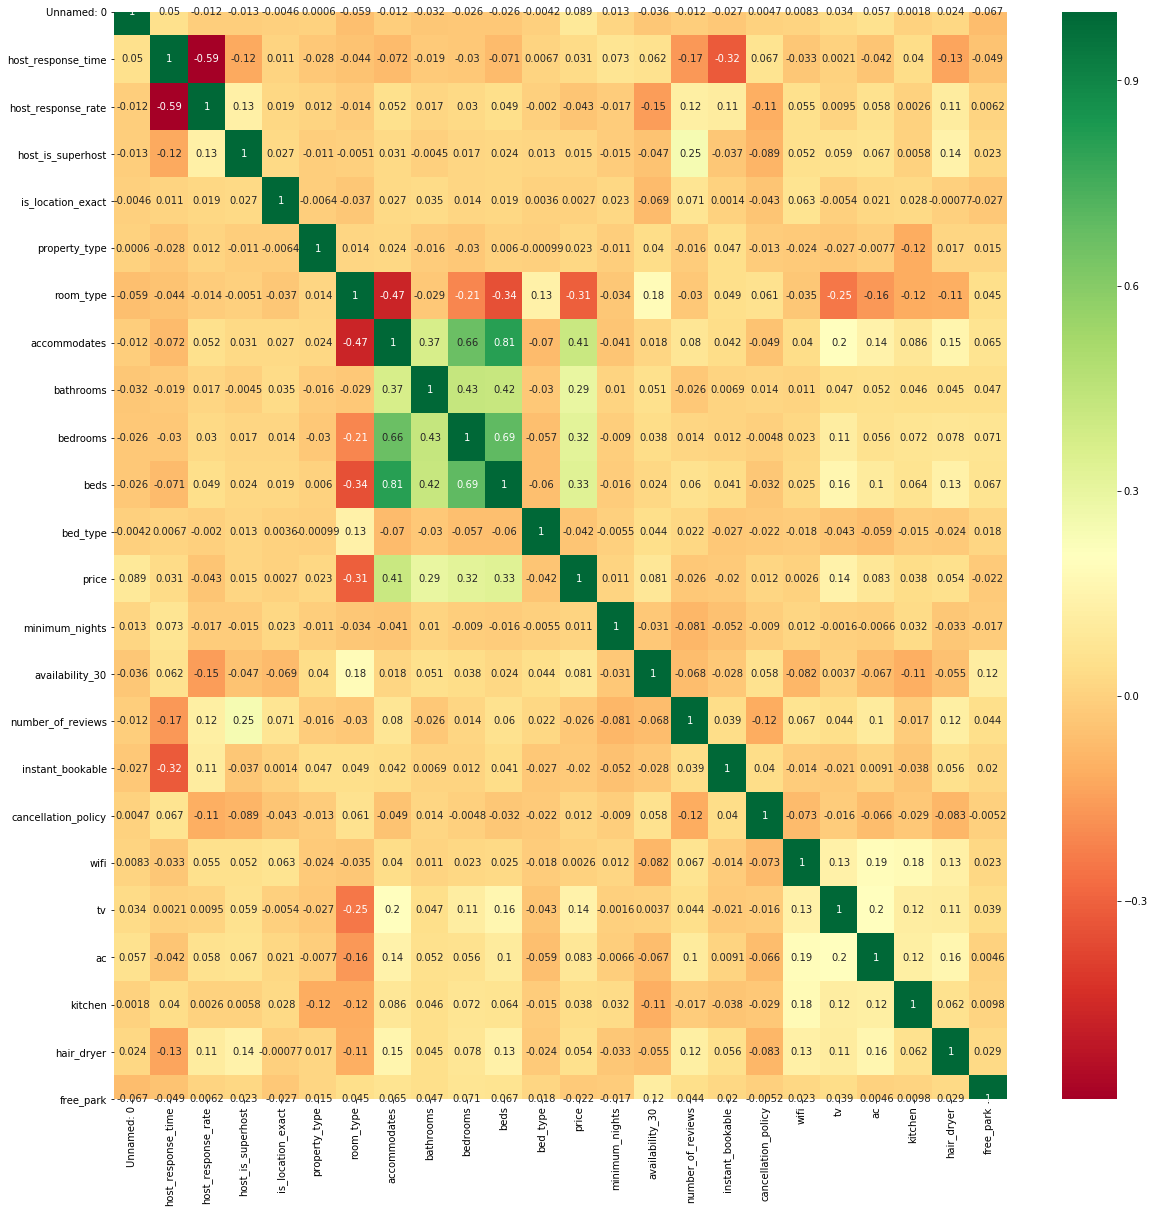

In [43]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Most important features from Covariance matrix:
room_type, accommodates, bathrooms, bedrooms, beds, tv

In [44]:
X1 = data[['room_type','accommodates','bathrooms','bedrooms','beds','tv']]
Y1 = data['price']

In [45]:
model1 = LinearRegression()
model1.fit(X1,Y1)
print(model1.coef_)

[-65.47897627  28.60377346  87.92050506  19.79567299 -17.30514088
  16.34894945]


In [46]:
y_pred3 = model1.predict(X1)

In [47]:
print(r2_score(Y,y_pred3))

0.22470418912781587


# PCA using one HOT encoding

In [48]:
pca = PCA(n_components = 10)

In [49]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 8.31647218e-03 -3.82248050e-04 -7.09935987e-04  1.15597154e-03
  -2.98000509e-04 -2.35193484e-03 -1.13603142e-02  4.93891683e-04
  -1.12112624e-03 -2.82986532e-03 -1.13028035e-04  9.99746438e-01
  -1.45685842e-02 -7.96575316e-03 -3.04531683e-03 -7.96754136e-04
   2.51042190e-04 -1.38355416e-04 -2.90446270e-04  1.12685770e-03
  -2.04002802e-03 -7.12183169e-04]
 [ 1.96918163e-02 -8.76995382e-03 -5.74058448e-03 -8.51487071e-03
   2.60627202e-03  3.16250973e-02  2.19040687e-02  8.74294452e-03
   1.29712177e-02  1.54126639e-02  2.21180935e-03  1.46101394e-02
   9.98154569e-01 -1.86995402e-02 -4.51259463e-03  1.35814426e-02
  -4.07736740e-03  8.93601746e-04 -7.25695833e-03 -9.23970696e-03
  -8.84815243e-03  1.19063445e-02]
 [-3.20627339e-02  4.91435422e-03  5.68113233e-03  5.16658293e-03
   1.20936338e-03 -1.11844660e-01  8.45263900e-01  7.81749162e-02
   2.38524807e-01  4.51198009e-01 -5.15949383e-03  1.10758144e-02
  -2.39611491e-02  2.81355307e-02  8.64249120e-03 -1.60497

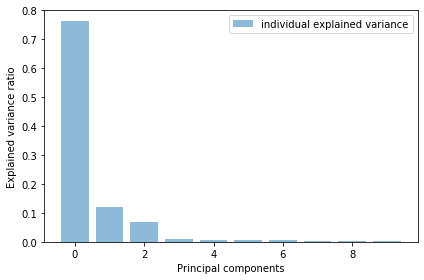

In [51]:
#plot explained variance 
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.ylim(0, 0.02)
plt.legend(loc = 'best')
plt.tight_layout()

In [52]:
pipe1 = Pipeline([
    ('pca', PCA(n_components = 10)),
    ('linear', LinearRegression())
])

In [53]:
pipe1.fit(X,Y)
y_pred1 = pipe1.predict(X)

In [54]:
print(r2_score(Y,y_pred1))

0.20453592165168555


In [55]:
K = pca.components_[0]
index = K.argsort()[-6:]

In [56]:
X.keys()[index]

Index(['wifi', 'bathrooms', 'kitchen', 'is_location_exact',
       'host_response_time', 'minimum_nights'],
      dtype='object')

[6.0, 4.0]


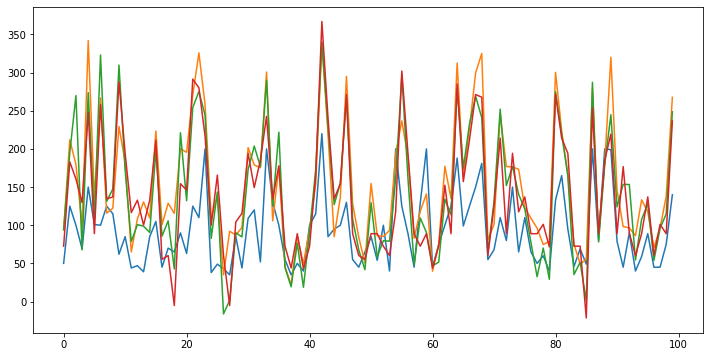

In [72]:
print(plt.rcParams['figure.figsize'])
figsize=[]
figsize.append(12)
figsize.append(6)
plt.rcParams['figure.figsize'] = figsize
plt.plot(Y[:100])
plt.plot(y_pred1[:100])
plt.plot(y_pred2[:100])
plt.plot(y_pred3[:100])